In [1]:
que = '오늘날씨는어떻게되나요?'

In [2]:
que[:5]

'오늘날씨는'

In [10]:
def chatbot(question):
    if '날씨' and '기온' in question :
        return '오늘날씨는더워요'
    else :
        return '무슨 말인지 모르겠습니다'

In [11]:
chatbot('오늘날씨는')

'무슨 말인지 모르겠습니다'

In [12]:
chatbot('오늘날이어때')

'무슨 말인지 모르겠습니다'

In [13]:
chatbot('오늘날씨와기온은')

'오늘날씨는더워요'

In [14]:
def chatbot(question):
    if '날씨' in question :
        return '오늘날씨는더워요'
    elif '기온' in question :
        return '오늘 날씨는 맑고 기온은 10도 입니다.'
    else :
        return '무슨 말인지 모르겠습니다'

In [17]:
chatbot('오늘 기온')

'오늘 날씨는 맑고 기온은 10도 입니다.'

In [18]:
words=['날씨','기온','온도', 'weather', '비', '우산', '구름']

In [28]:
def chatbot(question):
    for word in words:
        if word in question:
            return '오늘 날씨는 맑고 기온은 10도입니다.'
    return '무슨말인지 모르겠습니다'

In [29]:
chatbot('우박')

'무슨말인지 모르겠습니다'

In [30]:
chatbot('how is the weather')

'오늘 날씨는 맑고 기온은 10도입니다.'

In [39]:
import pandas as pd
def chatbot3(question):
    w=pd.read_csv('날씨키워드.csv', engine='python', encoding='euc-kr')
    for word in w.values:
        if word[0] in question:
            return '오늘 날씨는 너무 덥습니다'
        
    return '다시말해주세요'

In [40]:
from konlpy.tag import Komoran


In [41]:
tagger = Komoran()

In [42]:
tagger.nouns('고기온도가 어때?')

['고기', '온도']

In [43]:
tagger.nouns('오늘 축구 비겼어?')

['오늘', '축구']

In [49]:
def chatbot(question):
    w = pd.read_csv('날씨키워드.csv', engine='python', encoding ='euc-kr')
    nouns = tagger.nouns(question)
    for word in w.values:
        if word[0] in nouns:
            return '오늘 날씨는 맑고 기온은 10도입니다'
    return '무슨 말인지 모르겠습니다'

In [50]:
import re

In [60]:
r=re.compile(r'((?P<place>.+)날씨)')

In [61]:
m=r.match('서울의 날씨는 어때')
group = m.groupdict()
place = group['place']
tagger.nouns(place)

['서울']

In [68]:
def get_place(question):
    r=re.compile(r'((?P<place>.+)날씨)')
    m=r.match(question)
    group=m.groupdict()
    date=group['place']
    return tagger.nouns(place)

In [71]:
get_place('서울의 날씨 알려줘')

['서울']

In [72]:
get_place('제주도 날씨 어때')

['서울']

In [76]:
r=re.compile(r'((?P<date>\S+) )?((?P<place>\S+) )?날씨')

In [77]:
group = r.match('내일은 서울의 날씨가 어떨까?').groupdict()

In [78]:
group


{'date': '내일은', 'place': '서울의'}

In [80]:
def get_date_place(question):
    r=re.compile(r'((?P<date>\S+) )?((?P<place>\S+) )?날씨')
    m= r.match(question).groupdict()
    
    if m['date']:
        m['date'] = tagger.nouns(m['date'])
    if m['place']:
        m['place'] = tagger.nouns(m['place'])
        
    return m


In [81]:
get_date_place('내일은 서울의 날씨가 어때')

{'date': ['내일'], 'place': ['서울']}

In [82]:
w_date ={'오늘':'오늘은 전국적으로 비가 내릴 것으로 예상합니다', '내일':'내일은 맑습니다'}
w_place = {'서울': '서울의 최고기온은 30도 입니다.', '제주도':'제주도의 최고 기온은 28도 입니다'}

In [83]:
answer = get_date_place('오늘 서울의 날씨는 어때?')
answer

{'date': ['오늘'], 'place': ['서울']}

In [85]:
w_date[answer['date'][0]] +' '+w_place[answer['place'][0]]

'오늘은 전국적으로 비가 내릴 것으로 예상합니다 서울의 최고기온은 30도 입니다.'

In [95]:
def get_date_place(question):
    r=re.compile(r'((?P<date>\S+) )?((?P<place>\S+) )?날씨')
    m= r.match(question)
    
    if m:
        m = m.groupdict()
        
        if m['date']:
            date = tagger.nouns(m['date'])
            segment = w_date[date[0]]

        if m['place']:
            place = tagger.nouns(m['place'])
            segment2 = w_place[place[0]]
            
        segment = segment + '\n' + segment2
    else :
        segment = '무슨말인지 모르겠습니다'
    return segment


In [96]:
get_date_place('오늘 서울의 날씨는 어때')

'오늘은 전국적으로 비가 내릴 것으로 예상합니다\n서울의 최고기온은 30도 입니다.'

In [97]:
data_arg = ['오늘', '오늘은','내일', '내일은']
data_pred = ['날씨?','날씨는?','날씨어때?','날씨가 어때?']


In [98]:
data = []

for arg in data_arg:
    for pred in data_pred:
        sentence = arg+' '+ pred
        data.append(sentence)

In [99]:
data

['오늘 날씨?',
 '오늘 날씨는?',
 '오늘 날씨어때?',
 '오늘 날씨가 어때?',
 '오늘은 날씨?',
 '오늘은 날씨는?',
 '오늘은 날씨어때?',
 '오늘은 날씨가 어때?',
 '내일 날씨?',
 '내일 날씨는?',
 '내일 날씨어때?',
 '내일 날씨가 어때?',
 '내일은 날씨?',
 '내일은 날씨는?',
 '내일은 날씨어때?',
 '내일은 날씨가 어때?']

In [103]:
MAXLEN = max(len(s) for s in data)
MAXLEN

11

In [105]:
from keras.preprocessing.text import Tokenizer

In [108]:
tok = Tokenizer(char_level=True)
tok.fit_on_texts(data)
tok.word_index

{' ': 1,
 '날': 2,
 '씨': 3,
 '?': 4,
 '오': 5,
 '늘': 6,
 '어': 7,
 '때': 8,
 '은': 9,
 '내': 10,
 '일': 11,
 '는': 12,
 '가': 13}

In [111]:
sequence = tok.texts_to_sequences(data)
sequence

[[5, 6, 1, 2, 3, 4],
 [5, 6, 1, 2, 3, 12, 4],
 [5, 6, 1, 2, 3, 7, 8, 4],
 [5, 6, 1, 2, 3, 13, 1, 7, 8, 4],
 [5, 6, 9, 1, 2, 3, 4],
 [5, 6, 9, 1, 2, 3, 12, 4],
 [5, 6, 9, 1, 2, 3, 7, 8, 4],
 [5, 6, 9, 1, 2, 3, 13, 1, 7, 8, 4],
 [10, 11, 1, 2, 3, 4],
 [10, 11, 1, 2, 3, 12, 4],
 [10, 11, 1, 2, 3, 7, 8, 4],
 [10, 11, 1, 2, 3, 13, 1, 7, 8, 4],
 [10, 11, 9, 1, 2, 3, 4],
 [10, 11, 9, 1, 2, 3, 12, 4],
 [10, 11, 9, 1, 2, 3, 7, 8, 4],
 [10, 11, 9, 1, 2, 3, 13, 1, 7, 8, 4]]

In [112]:
from keras.preprocessing.sequence import pad_sequences

In [116]:
padded = pad_sequences(sequence, padding='post')
padded

array([[ 5,  6,  1,  2,  3,  4,  0,  0,  0,  0,  0],
       [ 5,  6,  1,  2,  3, 12,  4,  0,  0,  0,  0],
       [ 5,  6,  1,  2,  3,  7,  8,  4,  0,  0,  0],
       [ 5,  6,  1,  2,  3, 13,  1,  7,  8,  4,  0],
       [ 5,  6,  9,  1,  2,  3,  4,  0,  0,  0,  0],
       [ 5,  6,  9,  1,  2,  3, 12,  4,  0,  0,  0],
       [ 5,  6,  9,  1,  2,  3,  7,  8,  4,  0,  0],
       [ 5,  6,  9,  1,  2,  3, 13,  1,  7,  8,  4],
       [10, 11,  1,  2,  3,  4,  0,  0,  0,  0,  0],
       [10, 11,  1,  2,  3, 12,  4,  0,  0,  0,  0],
       [10, 11,  1,  2,  3,  7,  8,  4,  0,  0,  0],
       [10, 11,  1,  2,  3, 13,  1,  7,  8,  4,  0],
       [10, 11,  9,  1,  2,  3,  4,  0,  0,  0,  0],
       [10, 11,  9,  1,  2,  3, 12,  4,  0,  0,  0],
       [10, 11,  9,  1,  2,  3,  7,  8,  4,  0,  0],
       [10, 11,  9,  1,  2,  3, 13,  1,  7,  8,  4]])

In [117]:
labels = []
for s in data : 
    labels.append([1, 2] + [0 for _ in s [2:]])
labels

[[1, 2, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [118]:
import pandas as pd

In [119]:
pd.DataFrame([labels[6], list(data[6])])

,0,1,2,3,4,5,6,7,8
0,1,2,0,0,0,0,0,0,0
1,오,늘,은,,날,씨,어,때,?


In [120]:
y = pad_sequences(labels)

In [121]:
y

array([[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [122]:
y.shape

(16, 11)

In [123]:
y2 = y.reshape((16,11,1))
y2.shape

(16, 11, 1)

In [125]:
NUM_CHAR = len(tok.word_index)+1
NUM_CHAR

14

In [128]:
from keras.models import Sequential 
from keras.layers import Embedding, LSTM, Dense
from keras.layers import concatenate, TimeDistributed

In [130]:
model1 = Sequential()
model1.add(Embedding(NUM_CHAR, 2, input_length=MAXLEN))
model1.add(LSTM(2, return_sequences=True))
model1.add(TimeDistributed(Dense(3, activation = 'softmax')))
model1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 11, 2)             28        
_________________________________________________________________
lstm_2 (LSTM)                (None, 11, 2)             40        
_________________________________________________________________
time_distributed_2 (TimeDist (None, 11, 3)             9         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [131]:
model2 = Sequential()
model2.add(Embedding(NUM_CHAR, 2, input_length=MAXLEN))
model2.add(LSTM(2, return_sequences=True, go_backwards=True))
model2.add(TimeDistributed(Dense(3, activation = 'softmax')))
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 11, 2)             28        
_________________________________________________________________
lstm_3 (LSTM)                (None, 11, 2)             40        
_________________________________________________________________
time_distributed_3 (TimeDist (None, 11, 3)             9         
Total params: 77
Trainable params: 77
Non-trainable params: 0
_________________________________________________________________


In [132]:
from keras.models import Model
from keras.layers import Input

In [137]:
layer_input = Input(shape=(MAXLEN,),dtype = 'int32')
layer_embed=Embedding(NUM_CHAR, 2, input_length=MAXLEN)(layer_input)
layer_forward  = LSTM(2, return_sequences=True)(layer_embed)
layer_backward = LSTM(2, return_sequences=True, go_backwards = True)(layer_embed)
merged = concatenate([layer_forward, layer_backward])

outputs = TimeDistributed(Dense(3, activation='softmax'))(merged)
model3 = Model(layer_input, outputs)
model3.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 11)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 11, 2)        28          input_3[0][0]                    
__________________________________________________________________________________________________
lstm_8 (LSTM)                   (None, 11, 2)        40          embedding_6[0][0]                
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 11, 2)        40          embedding_6[0][0]                
__________________________________________________________________________________________________
concatenat

In [138]:
model1.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model2.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model3.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

W0814 16:02:34.527491 11428 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 16:02:34.541412 11428 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [139]:
history1 = model1.fit(padded, y2, batch_size=1, epochs=300)
history2= model2.fit(padded, y2, batch_size=1, epochs=300)
history3 = model3.fit(padded, y2, batch_size=1, epochs=300)

W0814 16:02:37.271567 11428 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 16:02:37.680329 11428 deprecation_wrapper.py:119] From C:\Users\Affinity\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/300
16/16 [==============================] - 1s 58ms/step - loss: 1.0737 - acc: 0.7955
Epoch 2/300
16/16 [==============================] - 0s 4ms/step - loss: 1.0334 - acc: 0.8182
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 0.9957 - acc: 0.8182
Epoch 4/300
16/16 [==============================] - 0s 4ms/step - loss: 0.9569 - acc: 0.8182
Epoch 5/300
16/16 [==============================] - 0s 4ms/step - loss: 0.9172 - acc: 0.8182
Epoch 6/300
16/16 [==============================] - 0s 4ms/step - loss: 0.8771 - acc: 0.8182
Epoch 7/300
16/16 [==============================] - 0s 4ms/step - loss: 0.8374 - acc: 0.8182
Epoch 8/300
16/16 [==============================] - 0s 4ms/step - loss: 0.7997 - acc: 0.8182
Epoch 9/300
16/16 [==============================] - 0s 4ms/step - loss: 0.7645 - acc: 0.8182
Epoch 10/300
16/16 [==============================] - 0s 4ms/step - loss: 0.7326 - acc: 0.8182
Epoch 11/300
16/16 [==============================] - 0s 5

16/16 [==============================] - 0s 5ms/step - loss: 0.5041 - acc: 0.8182
Epoch 88/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5037 - acc: 0.8182
Epoch 89/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5031 - acc: 0.8182
Epoch 90/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5027 - acc: 0.8182
Epoch 91/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5022 - acc: 0.8182
Epoch 92/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5018 - acc: 0.8182
Epoch 93/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5013 - acc: 0.8182
Epoch 94/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5010 - acc: 0.8182
Epoch 95/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5005 - acc: 0.8182
Epoch 96/300
16/16 [==============================] - 0s 4ms/step - loss: 0.5000 - acc: 0.8182
Epoch 97/300
16/16 [==============================] - 0s 4ms/st

16/16 [==============================] - 0s 5ms/step - loss: 0.4740 - acc: 0.8182
Epoch 173/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4737 - acc: 0.8182
Epoch 174/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4736 - acc: 0.8182
Epoch 175/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4734 - acc: 0.8182
Epoch 176/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4732 - acc: 0.8182
Epoch 177/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4731 - acc: 0.8182
Epoch 178/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4728 - acc: 0.8182
Epoch 179/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4728 - acc: 0.8182
Epoch 180/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4727 - acc: 0.8182
Epoch 181/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4723 - acc: 0.8182
Epoch 182/300
16/16 [==============================] -

16/16 [==============================] - 0s 5ms/step - loss: 0.4651 - acc: 0.8182
Epoch 258/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4639 - acc: 0.8182
Epoch 259/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4657 - acc: 0.8182
Epoch 260/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4645 - acc: 0.8182
Epoch 261/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4646 - acc: 0.8182
Epoch 262/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4634 - acc: 0.8182
Epoch 263/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4649 - acc: 0.8182
Epoch 264/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4633 - acc: 0.8182
Epoch 265/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4652 - acc: 0.8182
Epoch 266/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4644 - acc: 0.8182
Epoch 267/300
16/16 [==============================] -

16/16 [==============================] - 0s 5ms/step - loss: 0.3776 - acc: 0.8182
Epoch 44/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3699 - acc: 0.8182
Epoch 45/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3624 - acc: 0.8182
Epoch 46/300
16/16 [==============================] - 0s 4ms/step - loss: 0.3550 - acc: 0.8182
Epoch 47/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3474 - acc: 0.8182
Epoch 48/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3398 - acc: 0.8182
Epoch 49/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3323 - acc: 0.8182
Epoch 50/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3245 - acc: 0.8182
Epoch 51/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3170 - acc: 0.8182
Epoch 52/300
16/16 [==============================] - 0s 5ms/step - loss: 0.3095 - acc: 0.8182
Epoch 53/300
16/16 [==============================] - 0s 5ms/st

16/16 [==============================] - 0s 6ms/step - loss: 0.0582 - acc: 1.0000
Epoch 130/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0569 - acc: 1.0000
Epoch 131/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0556 - acc: 1.0000
Epoch 132/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0543 - acc: 1.0000
Epoch 133/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0530 - acc: 1.0000
Epoch 134/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0517 - acc: 1.0000
Epoch 135/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0505 - acc: 1.0000
Epoch 136/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0493 - acc: 1.0000
Epoch 137/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0481 - acc: 1.0000
Epoch 138/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0470 - acc: 1.0000
Epoch 139/300
16/16 [==============================] -

16/16 [==============================] - 0s 6ms/step - loss: 0.0070 - acc: 1.0000
Epoch 215/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0069 - acc: 1.0000
Epoch 216/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0067 - acc: 1.0000
Epoch 217/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0066 - acc: 1.0000
Epoch 218/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0064 - acc: 1.0000
Epoch 219/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0063 - acc: 1.0000
Epoch 220/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0062 - acc: 1.0000
Epoch 221/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0060 - acc: 1.0000
Epoch 222/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0059 - acc: 1.0000
Epoch 223/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0058 - acc: 1.0000
Epoch 224/300
16/16 [==============================] -

16/16 [==============================] - 0s 6ms/step - loss: 0.0014 - acc: 1.0000
Epoch 300/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0014 - acc: 1.0000
Epoch 1/300
16/16 [==============================] - 1s 77ms/step - loss: 1.0731 - acc: 0.7500
Epoch 2/300
16/16 [==============================] - 0s 7ms/step - loss: 1.0302 - acc: 0.8182
Epoch 3/300
16/16 [==============================] - 0s 7ms/step - loss: 0.9869 - acc: 0.8182
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 0.9396 - acc: 0.8182
Epoch 5/300
16/16 [==============================] - 0s 7ms/step - loss: 0.8887 - acc: 0.8182
Epoch 6/300
16/16 [==============================] - 0s 7ms/step - loss: 0.8367 - acc: 0.8182
Epoch 7/300
16/16 [==============================] - 0s 7ms/step - loss: 0.7854 - acc: 0.8182
Epoch 8/300
16/16 [==============================] - 0s 7ms/step - loss: 0.7378 - acc: 0.8182
Epoch 9/300
16/16 [==============================] - 0s 7ms/step - lo

16/16 [==============================] - 0s 9ms/step - loss: 0.2047 - acc: 0.9659
Epoch 86/300
16/16 [==============================] - 0s 8ms/step - loss: 0.2007 - acc: 0.9659
Epoch 87/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1965 - acc: 0.9659
Epoch 88/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1920 - acc: 0.9659
Epoch 89/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1891 - acc: 0.9773
Epoch 90/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1850 - acc: 0.9773
Epoch 91/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1813 - acc: 0.9773
Epoch 92/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1776 - acc: 0.9773
Epoch 93/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1742 - acc: 0.9773
Epoch 94/300
16/16 [==============================] - 0s 8ms/step - loss: 0.1708 - acc: 0.9773
Epoch 95/300
16/16 [==============================] - 0s 8ms/st

16/16 [==============================] - 0s 9ms/step - loss: 0.0307 - acc: 1.0000
Epoch 171/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0300 - acc: 1.0000
Epoch 172/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0292 - acc: 1.0000
Epoch 173/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0285 - acc: 1.0000
Epoch 174/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0277 - acc: 1.0000
Epoch 175/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0270 - acc: 1.0000
Epoch 176/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0263 - acc: 1.0000
Epoch 177/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0256 - acc: 1.0000
Epoch 178/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0249 - acc: 1.0000
Epoch 179/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0243 - acc: 1.0000
Epoch 180/300
16/16 [==============================] -

16/16 [==============================] - 0s 8ms/step - loss: 0.0048 - acc: 1.0000
Epoch 256/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0047 - acc: 1.0000
Epoch 257/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0047 - acc: 1.0000
Epoch 258/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0046 - acc: 1.0000
Epoch 259/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0045 - acc: 1.0000
Epoch 260/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0044 - acc: 1.0000
Epoch 261/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0043 - acc: 1.0000
Epoch 262/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0043 - acc: 1.0000
Epoch 263/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0042 - acc: 1.0000
Epoch 264/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0041 - acc: 1.0000
Epoch 265/300
16/16 [==============================] -

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

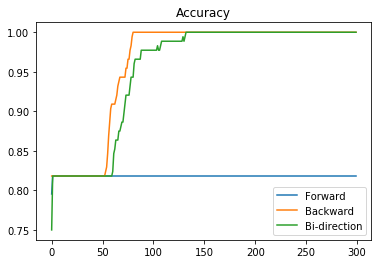

In [144]:
plt.plot(history1.history['acc'])
plt.plot(history2.history['acc'])
plt.plot(history3.history['acc'])
plt.title('Accuracy')
plt.legend(['Forward', 'Backward', 'Bi-direction'], loc='lower right');


In [145]:
pred = model1.predict(padded)
pred

array([[[8.58353734e-01, 7.53795058e-02, 6.62666932e-02],
        [7.22950161e-01, 1.40799373e-01, 1.36250570e-01],
        [5.79467356e-01, 2.06472933e-01, 2.14059681e-01],
        [4.79713053e-01, 2.50521004e-01, 2.69765943e-01],
        [3.86459053e-01, 2.89722860e-01, 3.23818028e-01],
        [3.54810715e-01, 3.04236978e-01, 3.40952307e-01],
        [4.87192035e-01, 2.49999568e-01, 2.62808383e-01],
        [7.71027803e-01, 1.19201787e-01, 1.09770440e-01],
        [9.74665761e-01, 1.48622459e-02, 1.04720201e-02],
        [9.97609854e-01, 1.56170188e-03, 8.28475982e-04],
        [9.98874009e-01, 7.58425507e-04, 3.67569097e-04]],

       [[8.58353734e-01, 7.53795058e-02, 6.62666932e-02],
        [7.22950161e-01, 1.40799373e-01, 1.36250570e-01],
        [5.79467356e-01, 2.06472933e-01, 2.14059681e-01],
        [4.79713053e-01, 2.50521004e-01, 2.69765943e-01],
        [3.86459053e-01, 2.89722860e-01, 3.23818028e-01],
        [5.40382624e-01, 2.26196364e-01, 2.33421028e-01],
        [6.5

In [147]:
result = pred.argmax(axis=2)
result

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

AttributeError: 'numpy.ndarray' object has no attribute 'result'